# Exploratory Data Analysis

When placed in Metapack data package, this notebook will load the package and run a variety of common EDA operations on the first resource. 


In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')


In [2]:
pkg = mp.jupyter.open_package()

# For testing and development
#pkg = mp.open_package('http://s3.amazonaws.com/library.metatab.org/cde.ca.gov-accountability_dashboard-2.zip')

pkg

# Tract Income Distributions
`civicknowledge.com-income_dist-tract-1.1.2` Last Update: 2021-02-22T01:02:49

_Estimated portions of households per tracts in income ranges_




 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [tract_income_dist](data/tract_income_dist.csv)**. Full tract income distribution estimates
* ** [income_quartiles](data/income_quartiles.csv)**. Estimated portions of households per tracts in quartile ranges

## References
<ul><li> <strong>pums</string>, <em>pums:{st}/h/2019/5</em>. PUMS template</li><li> <strong>puma_tract_map</string>, <em>data/puma_tract_map.csv</em>. Puma to tract map</li><li> <strong>us_tracts</string>, <em>metapack+http://library.metatab.org/civicknowledge.com-geohash-us.csv#us_tracts</em>. US Tracts, with tract numbers</li><li> <strong>households</string>, <em>census://2019/5/US/tract/B11001</em>. US Households by tract</li><li> <strong>median_income</string>, <em>census://2019/5/US/tract/B19013</em>. US Household median income by tract</li><li> <strong>agg_by_quintile</string>, <em>census://2019/5/US/tract/B19082</em>. Shares of Aggregate Household Income by Quintile</li><li> <strong>agg_hh_income</string>, <em>census://2019/5/US/tract/B19025</em>. Aggregate Household Income</li><li> <strong>agg_income</string>, <em>census://2019/5/US/tract/B19313</em>. Aggregate  Income</li><ul>

In [3]:
resource_name='tract_income_dist'

In [4]:
pkg.resource(resource_name)

Header,Type,Description
geoid,string,
tract_id,integer,
index,integer,
households,integer,
median_income,integer,
agg_income,integer,
agg_hh_income,integer,
hhinc_00,number,
hhinc_20,number,
hhinc_40,number,


In [5]:
df = pkg.resource(resource_name).read_csv(parse_dates=True)

In [6]:
df.head()

,geoid,tract_id,index,households,median_income,agg_income,agg_hh_income,hhinc_00,hhinc_20,hhinc_40,...,450k,455k,460k,465k,470k,475k,480k,485k,490k,495k
0,14000US01055010700,0,318,1376,46078,81490500,79543200.0,5.56,11.25,16.22,...,0,0,0,0,0.127917,0,0,0,0,0.042639
1,14000US01055001300,1,306,1092,22946,42149100,35495200.0,4.25,9.15,14.02,...,0,0,0,0,0.101515,0,0,0,0,0.033838
2,14000US01055000900,2,302,898,30238,43570000,34296100.0,5.12,10.35,15.22,...,0,0,0,0,0.083481,0,0,0,0,0.027827
3,14000US01055001700,3,308,684,24462,29897100,25409600.0,5.45,9.81,13.39,...,0,0,0,0,0.063587,0,0,0,0,0.021196
4,14000US01055010501,4,314,3200,73248,294057000,277982800.0,4.28,10.51,16.81,...,0,0,0,0,0.297481,0,0,0,0,0.099160


In [7]:
empty_col_names = [cn for cn in df.columns if df[cn].nunique() == 0]
const_col_names= [cn for cn in df.columns if df[cn].nunique() == 1]
ignore_cols = empty_col_names+const_col_names
dt_col_names= list(df.select_dtypes(include=[np.datetime64]).columns)

number_col_names = [ cn for cn in df.select_dtypes(include=[np.number]).columns if cn not in ignore_cols ]
other_col_names = [cn for cn in df.columns if cn not in (empty_col_names+const_col_names+dt_col_names+number_col_names)]

In [8]:
pd.DataFrame.from_dict({'empty':[len(empty_col_names)], 
                        'const':[len(const_col_names)],
                        'datetime':[len(dt_col_names)],
                        'number':[len(number_col_names)],
                        'other':[len(other_col_names)],
                       }, 
                       orient='index', columns=['count'])

,count
empty,0
const,30
datetime,0
number,84
other,1


# Constant Columns

In [9]:
if const_col_names:
    display(df[const_col_names].drop_duplicates().T)

,0
medinc,15000.0
260k,0.0
280k,0.0
285k,0.0
290k,0.0
315k,0.0
340k,0.0
350k,0.0
355k,0.0
375k,0.0


# Empty Columns

In [10]:
if empty_col_names:
    display(df[empty_col_names].drop_duplicates().T)

# Date and Time Columns

In [11]:
if dt_col_names:
    display(df[dt_col_names].info())
    display(df[dt_col_names].describe().T)

# Number Columns

In [12]:
if number_col_names:
    display(df[number_col_names].info())
    display(df[number_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72913 entries, 0 to 72912
Data columns (total 84 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tract_id       72913 non-null  int64  
 1   index          72913 non-null  int64  
 2   households     72913 non-null  int64  
 3   median_income  72913 non-null  int64  
 4   agg_income     72913 non-null  int64  
 5   agg_hh_income  72912 non-null  float64
 6   hhinc_00       72117 non-null  float64
 7   hhinc_20       72128 non-null  float64
 8   hhinc_40       72132 non-null  float64
 9   hhinc_60       72132 non-null  float64
 10  hhinc_80       72132 non-null  float64
 11  hhinc_95       72132 non-null  float64
 12  _5k            72913 non-null  float64
 13  0k             72913 non-null  float64
 14  5k             72913 non-null  float64
 15  10k            72913 non-null  float64
 16  15k            72913 non-null  float64
 17  20k            72913 non-null  float64
 18  25k   

None

,count,mean,std,min,25%,50%,75%,max
tract_id,72913.0,3.696873e+04,2.136183e+04,0.000000,1.847600e+04,3.698600e+04,5.547200e+04,7.400000e+04
index,72913.0,3.696867e+04,2.136286e+04,0.000000,1.847600e+04,3.698300e+04,5.547100e+04,7.400000e+04
households,72913.0,1.672323e+03,8.160044e+02,12.000000,1.121000e+03,1.556000e+03,2.079000e+03,2.120900e+04
median_income,72913.0,6.652993e+04,3.364336e+04,2499.000000,4.381800e+04,5.919800e+04,8.133600e+04,2.500010e+05
agg_income,72913.0,1.523738e+08,1.175413e+08,150900.000000,7.701680e+07,1.229950e+08,1.928095e+08,3.724495e+09
...,...,...,...,...,...,...,...,...
370k,72913.0,1.036424e-01,5.057199e-02,0.000744,6.947414e-02,9.643333e-02,1.288463e-01,1.314431e+00
400k,72913.0,1.645797e-04,1.282789e-02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
440k,72913.0,2.072849e-01,1.011440e-01,0.001487,1.389483e-01,1.928667e-01,2.576927e-01,2.628862e+00
470k,72913.0,1.554637e-01,7.585799e-02,0.001116,1.042112e-01,1.446500e-01,1.932695e-01,1.971646e+00


## Distributions

In [13]:
def plot_histograms(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(3*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(3*n_cols,3*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.distplot(df[col_names[i]].dropna(),kde=True) 
            g.set(xticklabels=[])
            g.set(yticklabels=[])
        except:
            pass
        
    plt.tight_layout()
        


/Users/eric/proj/code-projects/radius-search/demosearch/venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if sys.path[0] == '':
/Users/eric/proj/code-projects/radius-search/demosearch/venv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/eric/proj/code-projects/radius-search/demosearch/venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if sys.path[0] == '':

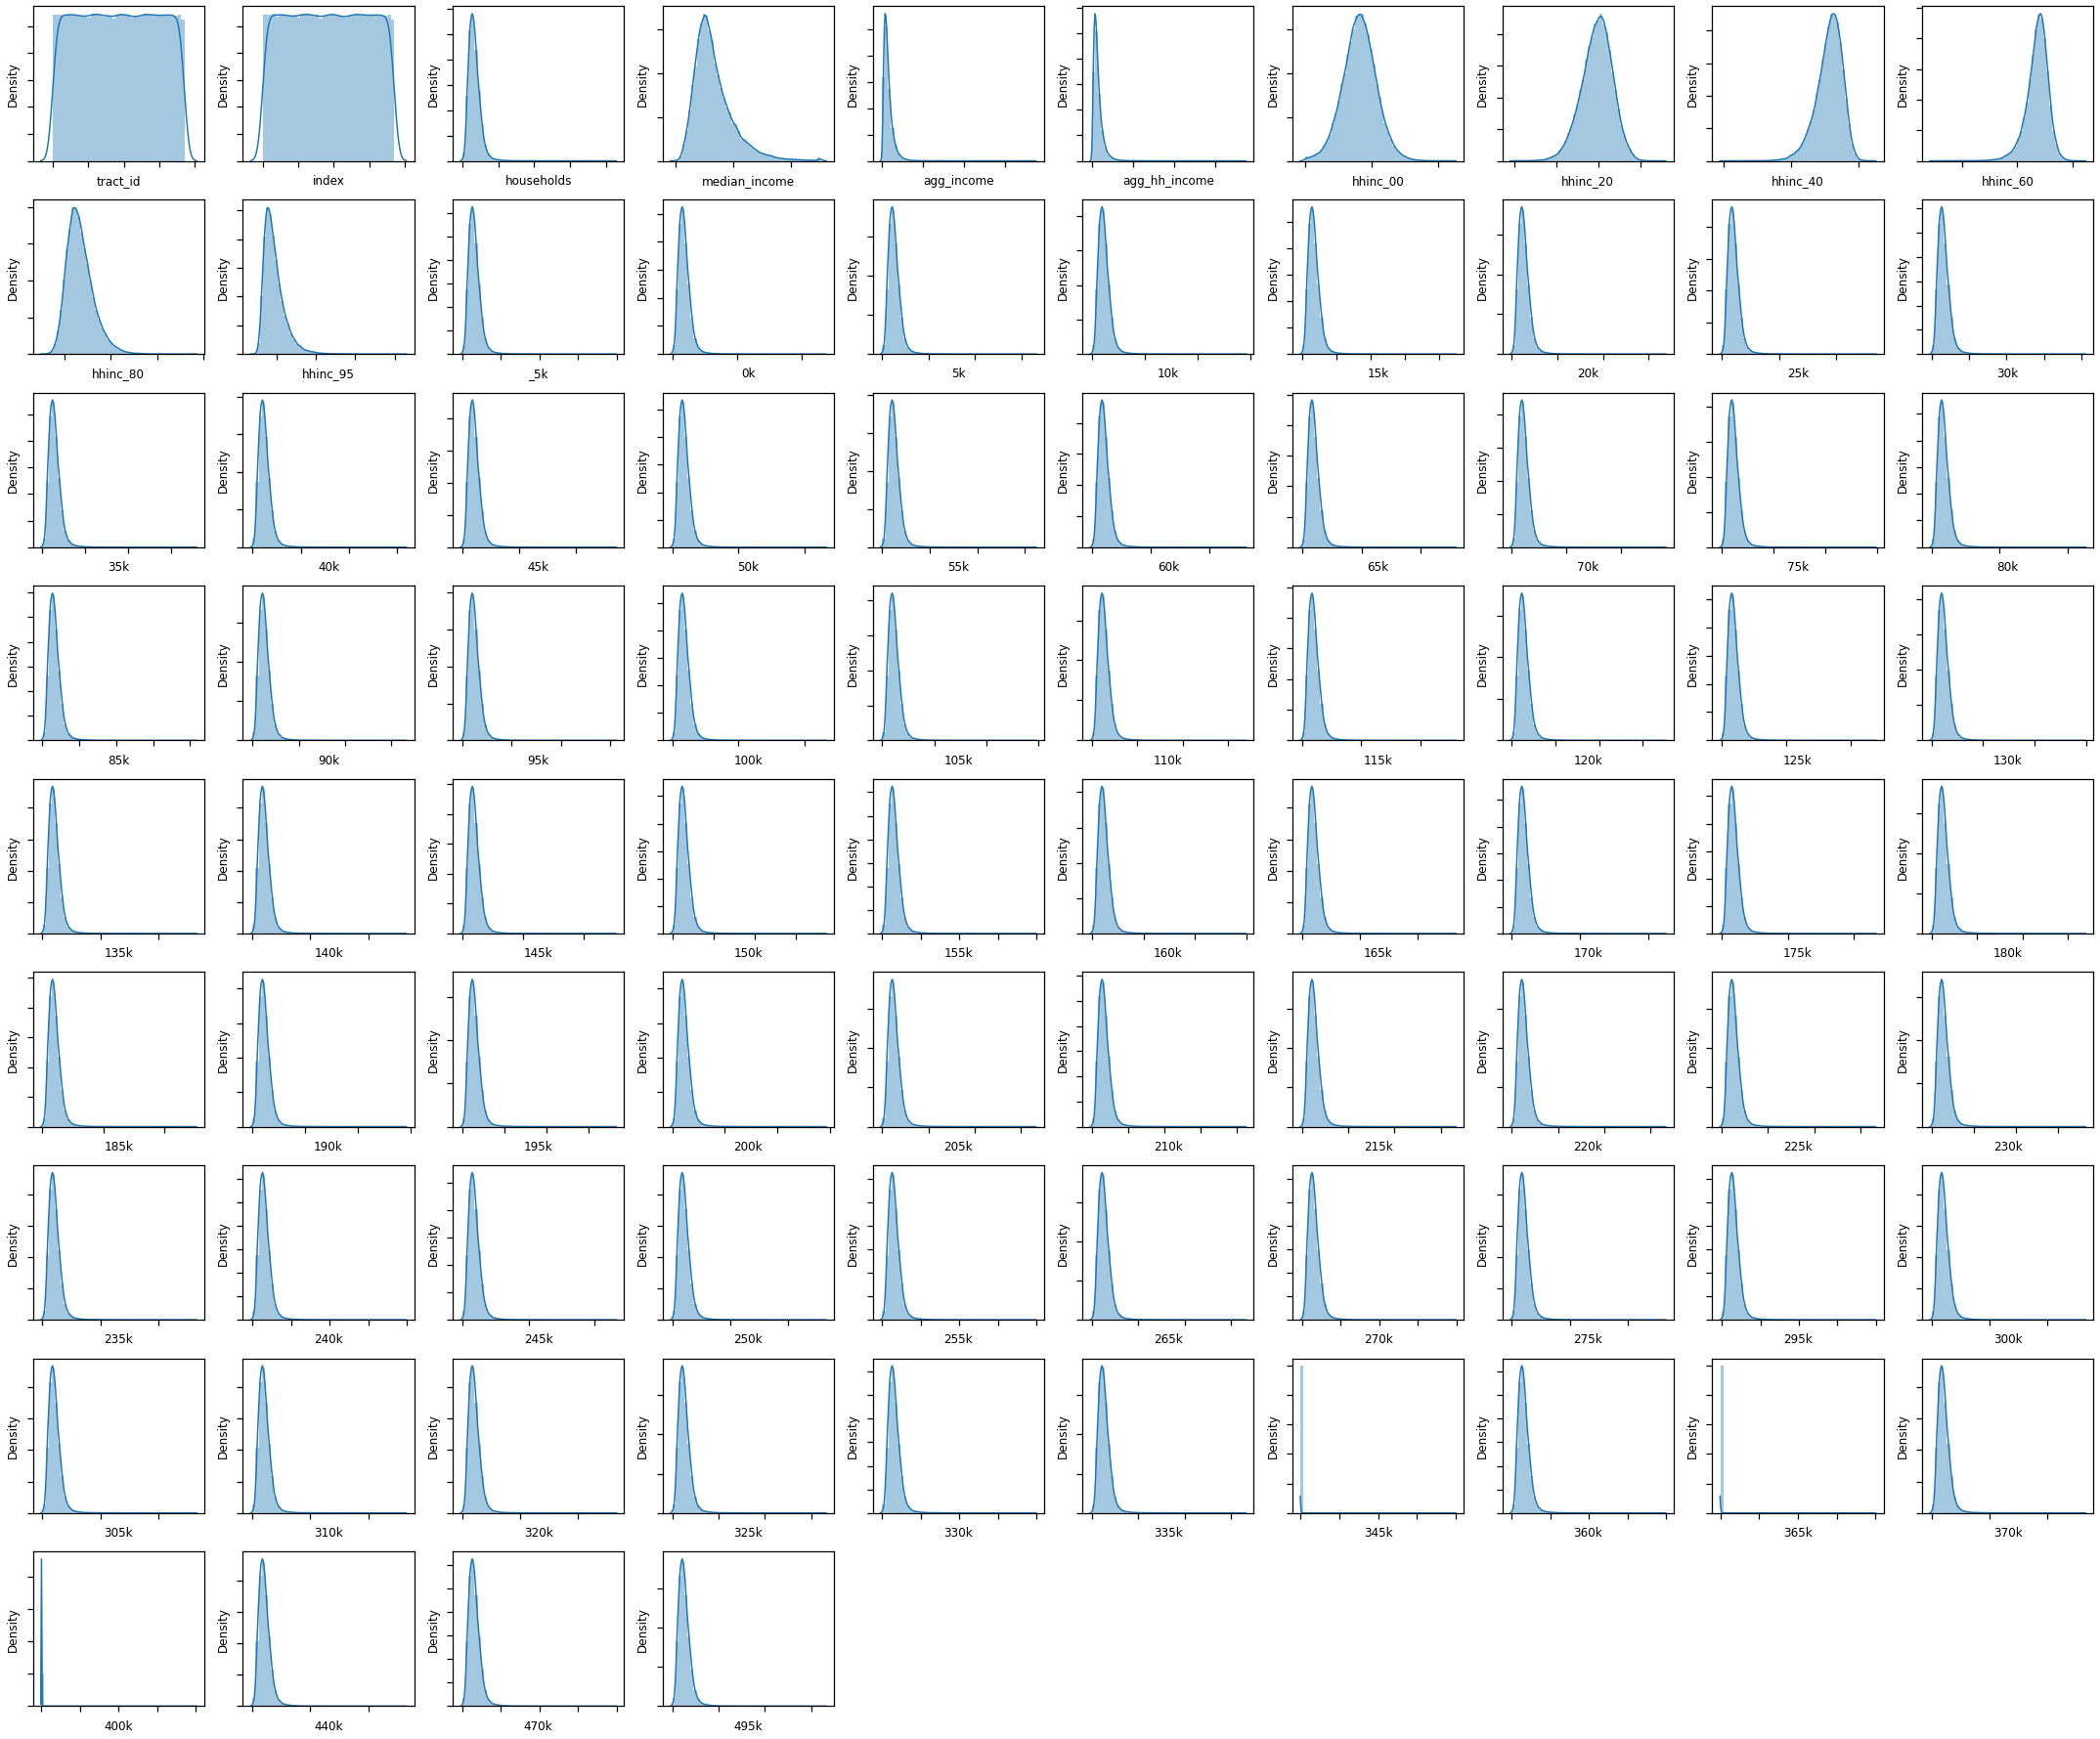

In [14]:
plot_histograms(df[number_col_names])

## Box Plots

In [15]:
def plot_boxes(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(2*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(2*n_cols,5*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.boxplot(df[col_names[i]].dropna(),orient='v') 
        except:
            pass
        
    plt.tight_layout()
  

/Users/eric/proj/code-projects/radius-search/demosearch/venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if sys.path[0] == '':
/Users/eric/proj/code-projects/radius-search/demosearch/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/eric/proj/code-projects/radius-search/demosearch/venv/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/eric/proj/code-projects/radius-search/demosearch/venv/lib/python3.7/site-packages/ipyk

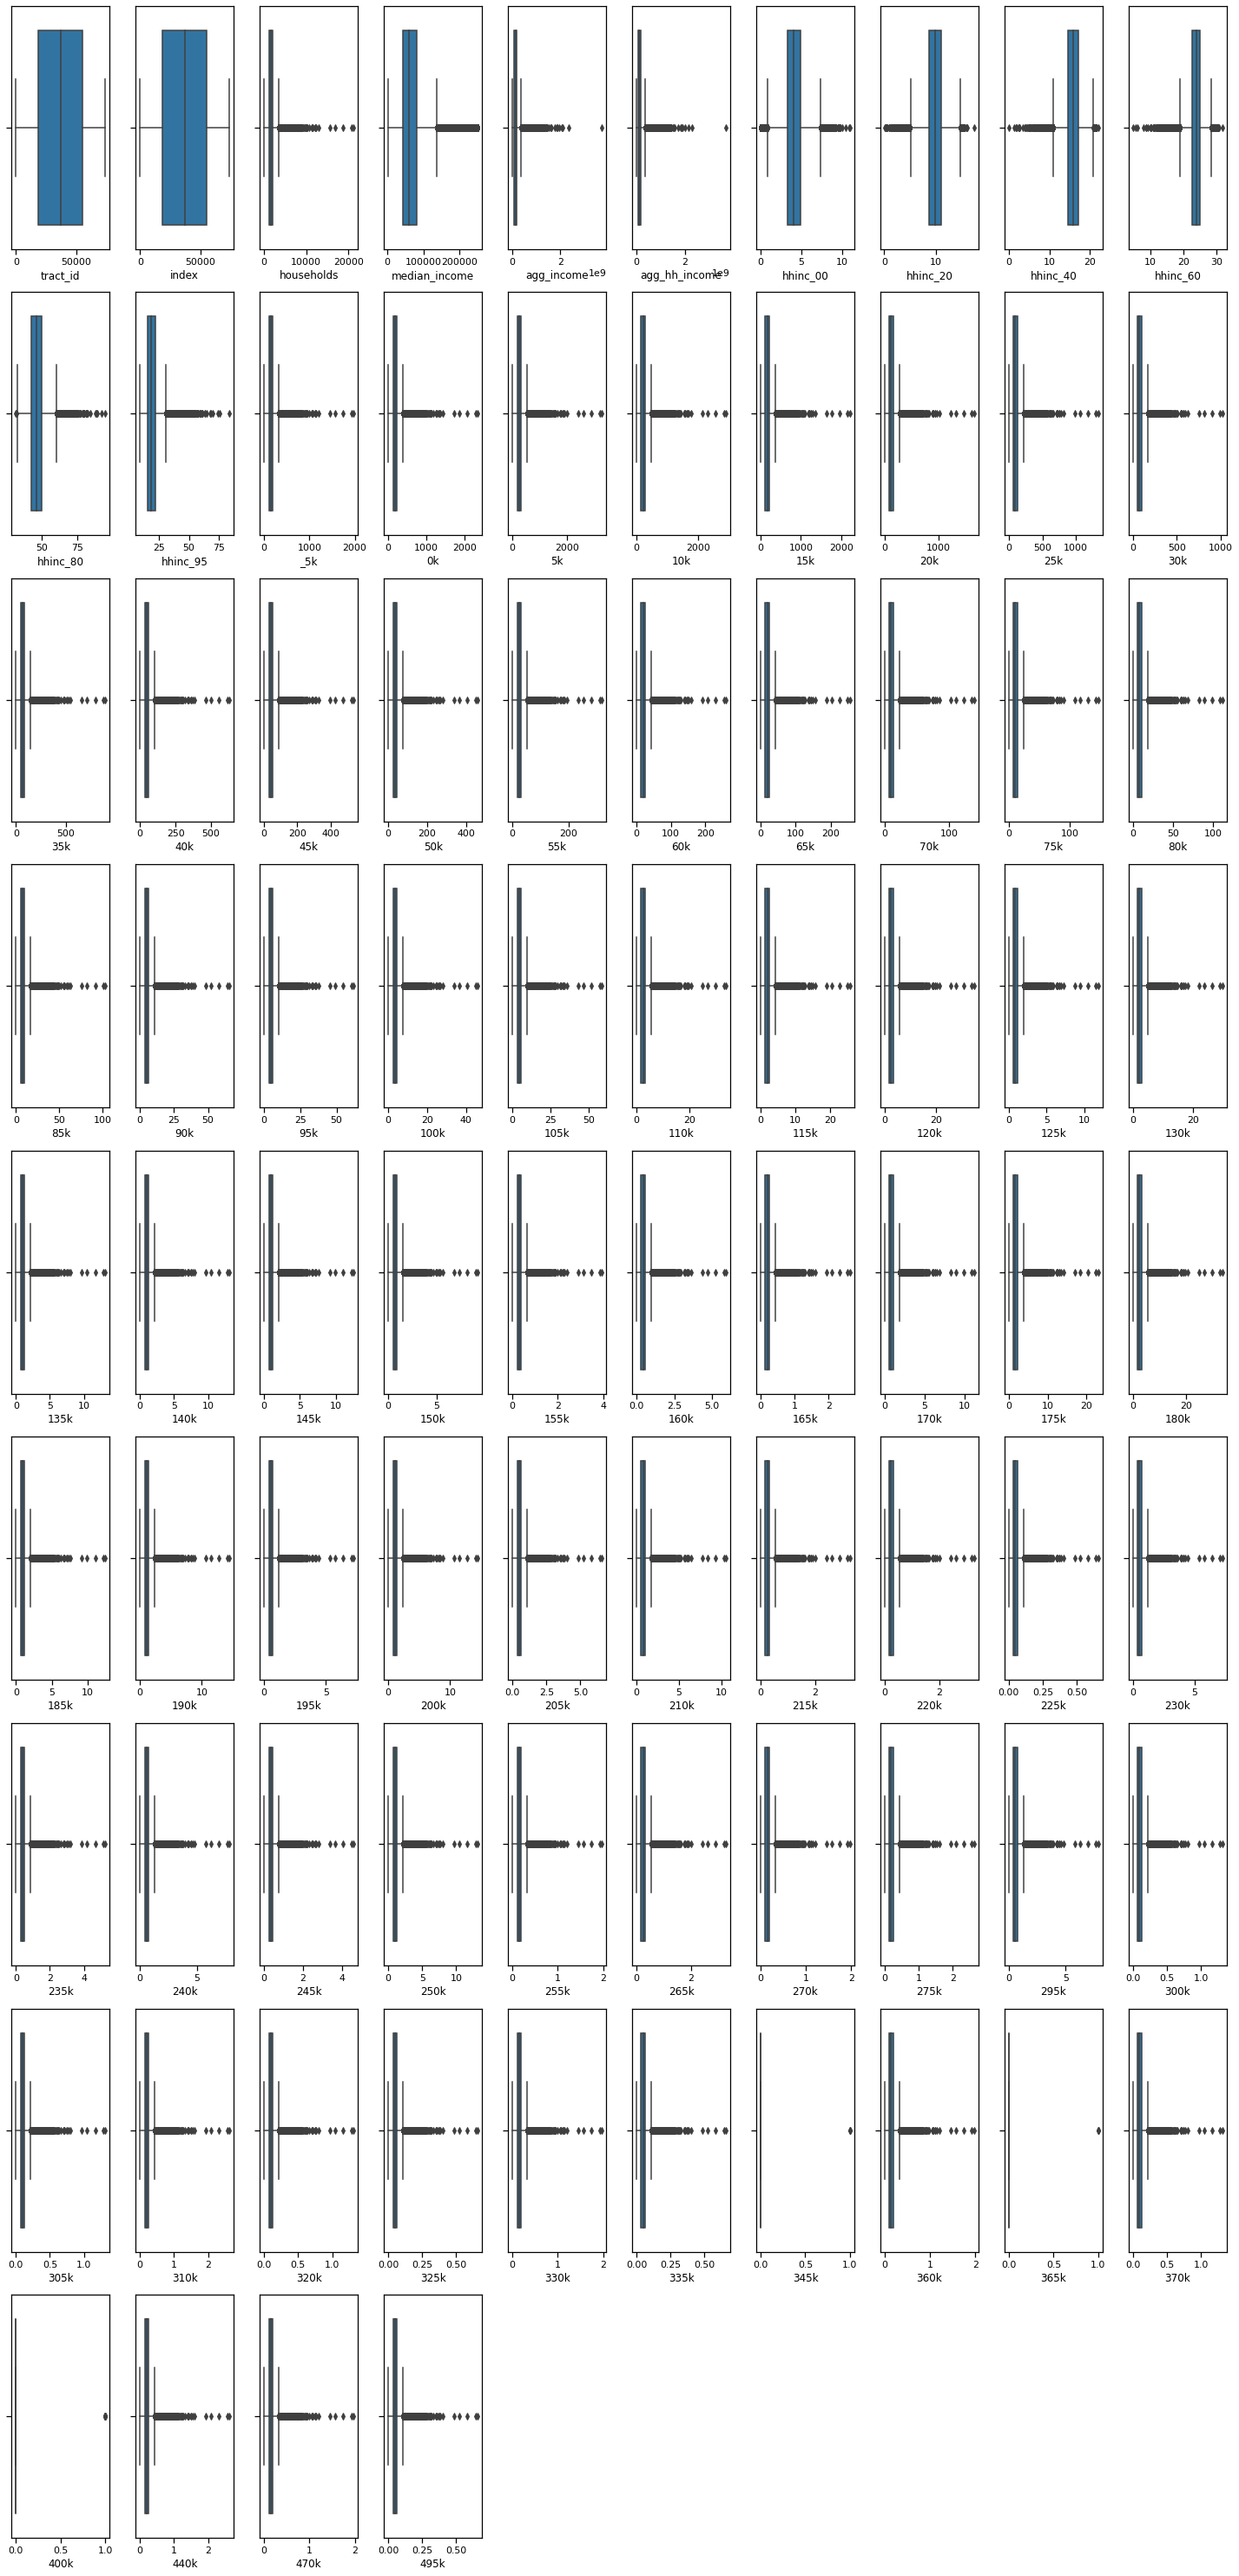

In [16]:
  
plot_boxes(df[number_col_names])

In [17]:
## Correlations

<AxesSubplot:>

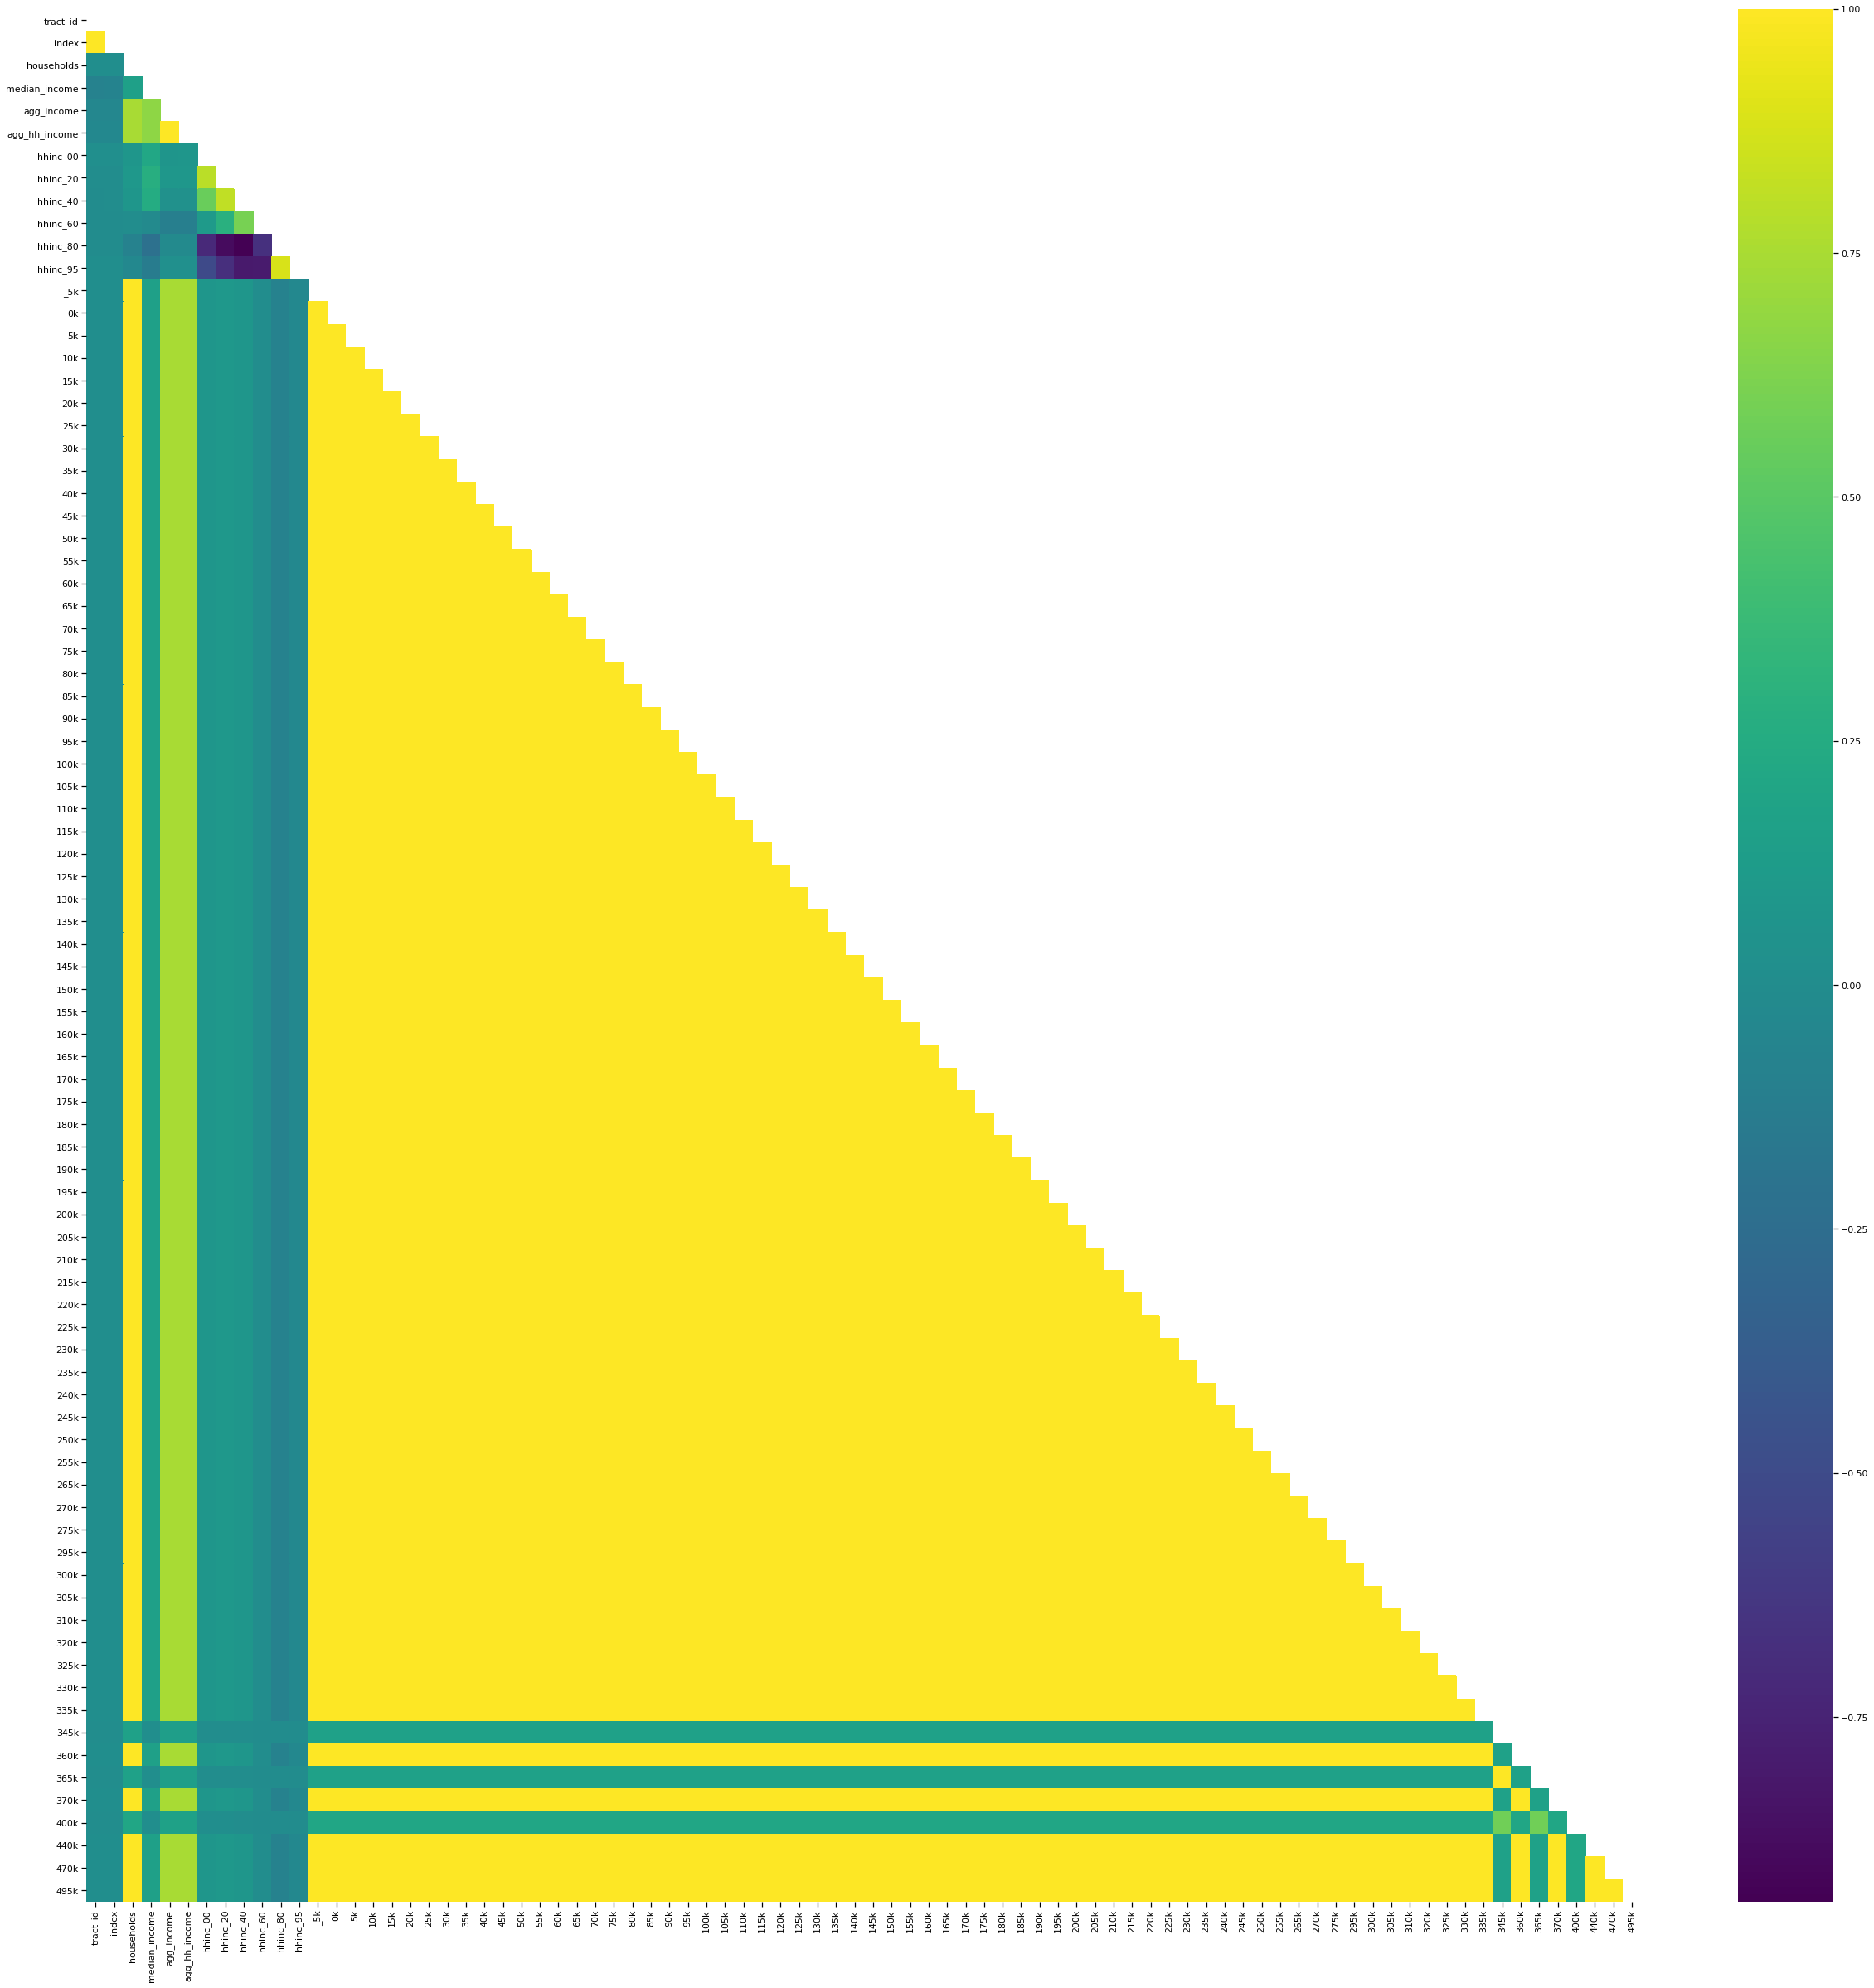

In [18]:

cm = df[number_col_names].corr()

mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(.5*len(number_col_names),.5*len(number_col_names)))
sns.heatmap(cm, mask=mask, cmap = 'viridis')   

# Other Columns

In [19]:
if other_col_names:
    display(df[other_col_names].info())
    display(df[other_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72913 entries, 0 to 72912
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   geoid   72913 non-null  object
dtypes: object(1)
memory usage: 569.8+ KB


None

,count,unique,top,freq
geoid,72913,72913,14000US47157006600,1


# Nulls


<AxesSubplot:>

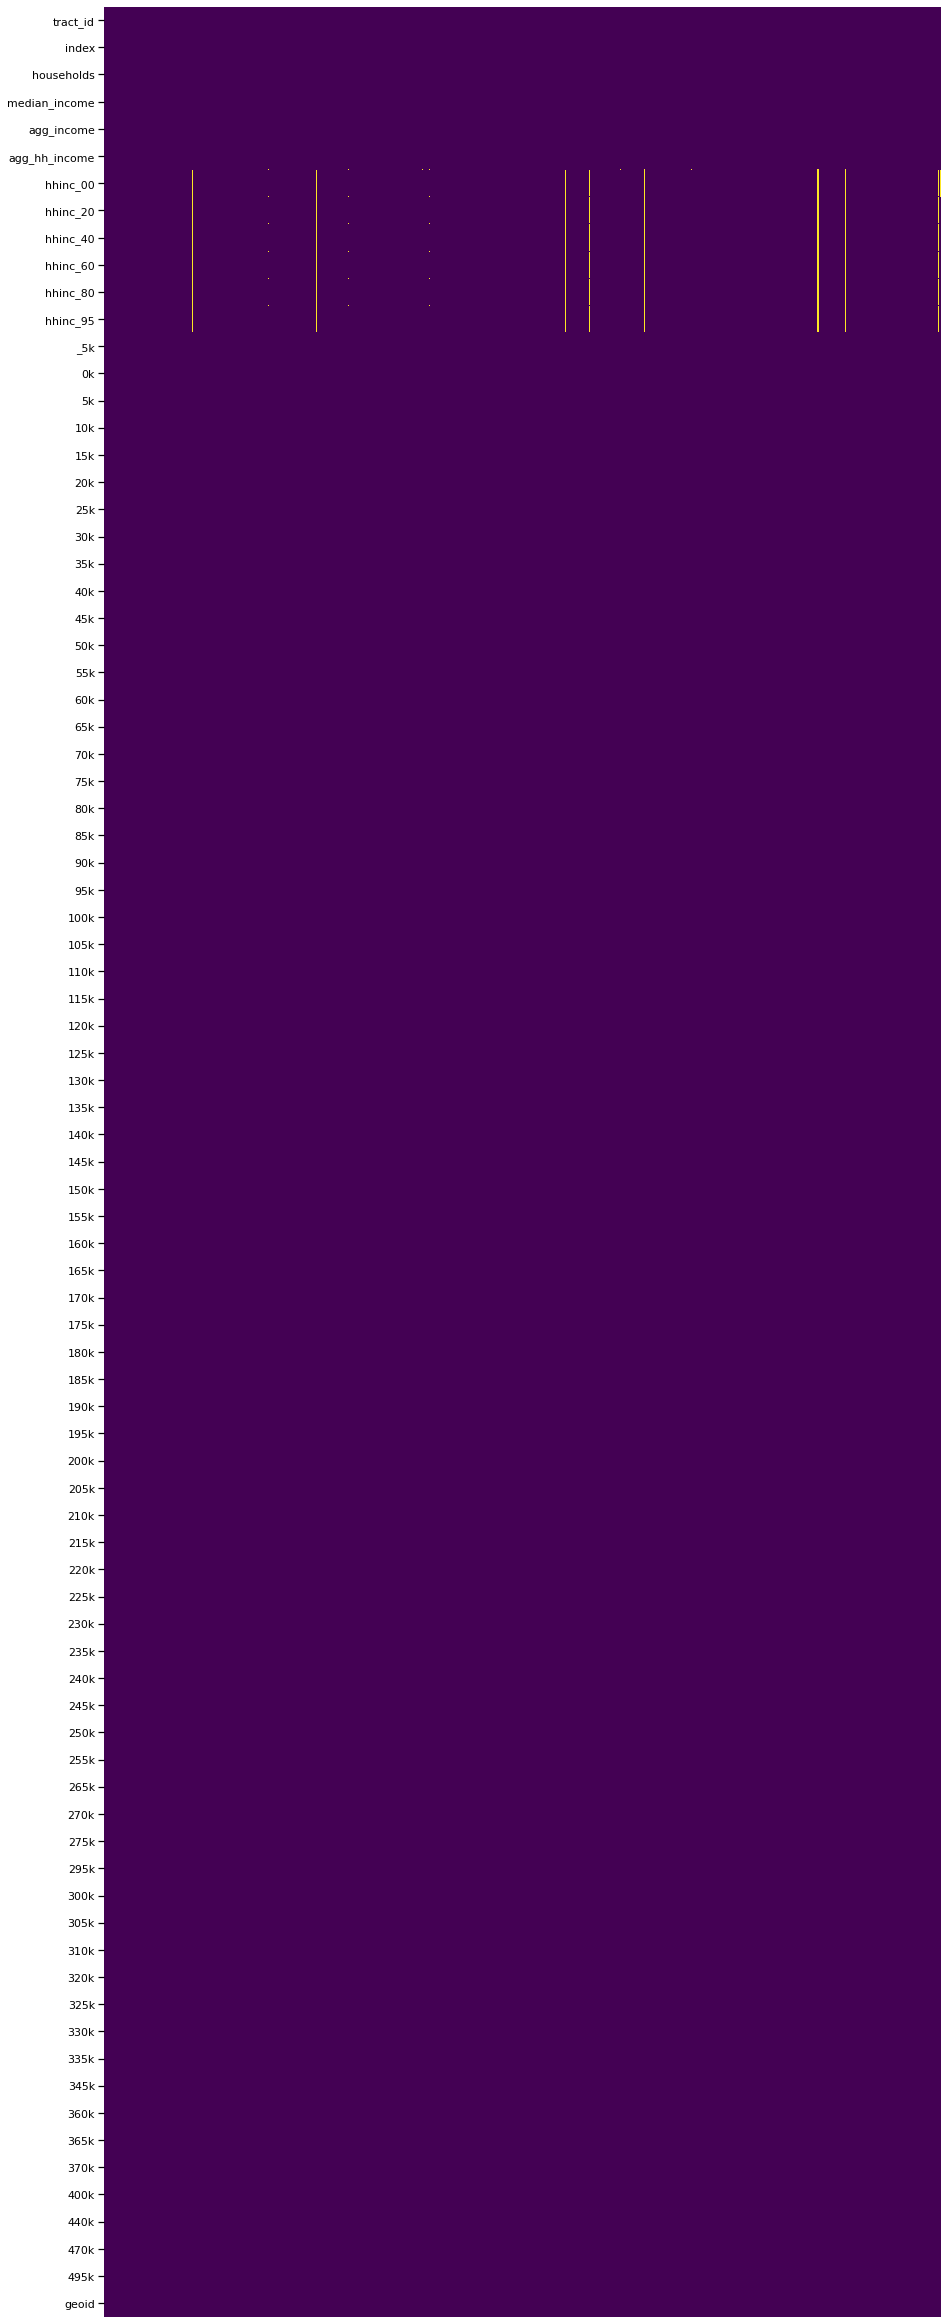

In [20]:
cols = dt_col_names + number_col_names + other_col_names

fig, ax = plt.subplots(figsize=(15,.5*len(cols)))
sns.heatmap(df[cols].isnull().T,cbar=False,xticklabels=False,cmap = 'viridis', ax=ax )